In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-matrixanaly-evd)=
# Eigenvalue decomposition

To this point we have dealt frequently with the solution of the linear system $\mathbf{A}\mathbf{x}=\mathbf{b}$. Alongside this problem in its importance to linear algebra is the eigenvalue problem.

```{index} ! eigenvalue, ! eigenvector
```

(definition-evd-eigenvalue)=
::::{proof:definition} Eigenvalue and eigenvector
Given a square matrix $\mathbf{A}$, if 

```{math}
:label: eigdef
\mathbf{A}\mathbf{x} = \lambda \mathbf{x}
```

for a scalar $\lambda$ and a nonzero vector $\mathbf{x}$, then $\lambda$ is an **eigenvalue** and $\mathbf{x}$ is an associated **eigenvector**.
::::

## Complex matrices

A matrix with real entries can have complex eigenvalues. Therefore we assume all matrices, vectors, and scalars may be complex in what follows. Recall that a complex number can be represented as $a+i b$ for real $a$ and $b$ and where $i^2=-1$. The **complex conjugate** of $x=a+i b$ is denoted $\bar{x}$ and is given by $\bar{x}=a-i b$. The **magnitude** or *modulus* of a complex number $z$ is 

$$
|z| = \sqrt{z\cdot \bar{z}}.
$$

```{index} ! unitary matrix, orthogonal matrix
```

::::{proof:definition} Terms for complex matrices
The **adjoint** or *hermitian* of a matrix $\mathbf{A}$ is denoted $\mathbf{A}^*$ and is given by $\mathbf{A}^*=(\overline{\mathbf{A}})^T=\overline{\mathbf{A}^T}$. The matrix is **self-adjoint** or **hermitian** if $\mathbf{A}^*=\mathbf{A}$.

The **2-norm** of a complex vector $\mathbf{u}$ is $\sqrt{\mathbf{u}^*\mathbf{u}}$. Other vector norms, and all matrix norms, are as defined in {numref}`section-linsys-norms`.

Complex vectors $\mathbf{u}$ and $\mathbf{v}$ of the same dimension are **orthogonal** if $\mathbf{u}^*\mathbf{v}=0$. **Orthonormal** vectors are mutually orthogonal and have unit 2-norm. A **unitary** matrix is a square matrix with orthonormal columns, or, equivalently, a matrix satisfying $\mathbf{A}^* = \mathbf{A}^{-1}$.
::::

For the most part, "adjoint" replaces "transpose," "hermitian" replaces "symmetric," and "unitary matrix" replaces "orthogonal matrix" when applying our previous results to complex matrices. 

## Eigenvalue decomposition

```{index} ! characteristic polynomial
```

An easy rewrite of the eigenvalue definition {eq}`eigdef` is that $(\mathbf{A} - \lambda\mathbf{I}) \mathbf{x} = \boldsymbol{0}$. Hence $(\mathbf{A} - \lambda\mathbf{I})$ is singular, and it therefore must have a zero determinant. This is the property most often used to compute eigenvalues by hand.

::::{proof:example}
Given 

```{math}
\mathbf{A} = \begin{bmatrix} 1 & 1 \\ 4 & 1 \end{bmatrix},
```

we compute

```{math}
\begin{vmatrix}
1-\lambda & 1\\ 
4 & 1-\lambda
\end{vmatrix}
= (1-\lambda)^2 - 4 = \lambda^2-2\lambda-3.
```

The eigenvalues are the roots of this quadratic, $\lambda_1=3$ and $\lambda_2=-1$. 
::::

The determinant $\det(\mathbf{A} - \lambda \mathbf{I})$ is called the **characteristic polynomial**. Its roots are the eigenvalues, so we know that an $n\times n$ matrix has $n$ eigenvalues, counting algebraic multiplicity. 

Suppose that $\mathbf{A}\mathbf{v}_k=\lambda_k\mathbf{v}_k$ for $k=1,\ldots,n$. We can summarize these as

```{math}
   \begin{bmatrix}
    \mathbf{A}\mathbf{v}_1 & \mathbf{A}\mathbf{v}_2 & \cdots & \mathbf{A}\mathbf{v}_n
  \end{bmatrix}
  &=
    \begin{bmatrix}
      \lambda_1 \mathbf{v}_1 & \lambda_2\mathbf{v}_2 & \cdots & \lambda_n \mathbf{v}_n
    \end{bmatrix}, \\[1mm]
  \mathbf{A} \begin{bmatrix}
    \mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_n
  \end{bmatrix}
  &=
\begin{bmatrix}
    \mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_n
  \end{bmatrix}
  \begin{bmatrix}
    \lambda_1 & &  &  \\
    & \lambda_2 & & \\
    & & \ddots & \\
    & & & \lambda_n
  \end{bmatrix},
```

which we write as

```{math}
:label: ev-all
  \mathbf{A} \mathbf{V} = \mathbf{V} \mathbf{D}.
```

If we find that $\mathbf{V}$ is a nonsingular matrix, then we arrive at a key factorization.[^factdecomp]

[^factdecomp]: The terms "factorization" and "decomposition" are equivalent; they coexist mainly for historical reasons.

```{index} ! matrix factorization; EVD, diagonal matrix
```

```{index} ! eigenvalue decomposition, ! diagonalizable matrix
```

::::{proof:definition} Eigenvalue decomposition (EVD)
An **eigenvalue decomposition** (EVD) of a square matrix $\mathbf{A}$ is

```{math}
:label: evdecomp
\mathbf{A} = \mathbf{V} \mathbf{D} \mathbf{V}^{-1}.
```

If $\mathbf{A}$ has an EVD, we say that $\mathbf{A}$ is **diagonalizable**; otherwise $\mathbf{A}$ is **nondiagonalizable** (or *defective*).
::::

Observe that if $\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ for nonzero $\mathbf{v}$, then the equation remains true for any nonzero multiple of $\mathbf{v}$. Therefore, eigenvectors are not unique, and thus neither is an EVD.

We stress that while {eq}`ev-all` is possible for all square matrices, {eq}`evdecomp` is not.  One simple example of a nondiagonalizable matrix is

```{math}
  :label: jordanblock
  \mathbf{B} = \begin{bmatrix}
    1 & 1\\0 & 1
  \end{bmatrix}.
```

There is a common circumstance in which we can guarantee an EVD exists. The proof of the following theorem can be found in many elementary texts on linear algebra.

````{proof:theorem}
If the $n\times n$ matrix $\mathbf{A}$ has $n$ distinct eigenvalues, then $\mathbf{A}$ is diagonalizable.
````

(demo-evd-eigen)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

```{index} ! Julia; eigvals
```

The `eigvals` function returns a vector of the eigenvalues of a matrix.

In [2]:
A = π*ones(2,2)

2×2 Matrix{Float64}:
 3.14159  3.14159
 3.14159  3.14159

In [3]:
λ = eigvals(A)

2-element Vector{Float64}:
 0.0
 6.283185307179586

```{index} ! Julia; eigen
```

If you want the eigenvectors as well, use `eigen`.

In [4]:
λ,V = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.0
 6.283185307179586
vectors:
2×2 Matrix{Float64}:
 -0.707107  0.707107
  0.707107  0.707107

In [5]:
norm( A*V[:,2] - λ[2]*V[:,2] )

0.0

```{index} ! Julia; sortby
```

Both functions allow you to sort the eigenvalues by specified criteria.

In [6]:
A = diagm(-2.3:1.7)
@show eigvals(A,sortby=real);
@show eigvals(A,sortby=abs);

eigvals(A, sortby = real) = [-2.3, -1.3, -0.3, 0.7, 1.7]
eigvals(A, sortby = abs) = [-0.3, 0.7, -1.3, 1.7, -2.3]


If the matrix is not diagonalizable, no message is given, but `V` will be singular. The robust way to detect that circumstance is via $\kappa(\mathbf{V})$. 

```{index} condition number; of a matrix
```

In [7]:
A = [-1 1;0 -1]
λ,V = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -1.0
 -1.0
vectors:
2×2 Matrix{Float64}:
 1.0  -1.0
 0.0   2.22045e-16

In [8]:
cond(V)

9.007199254740991e15

Even in the nondiagonalizable case, $\mathbf{A}\mathbf{V} = \mathbf{V}\mathbf{D}$ holds.

In [9]:
opnorm(A*V - V*diagm(λ))

2.220446049250313e-16

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Similarity and matrix powers

```{index} ! similarity transformation
```

The particular relationship between matrices $\mathbf{A}$ and $\mathbf{D}$ in {eq}`evdecomp` is important. 

:::{proof:definition} Similar matrices
If $\mathbf{S}$ is any nonsingular matrix, we say that $\mathbf{B}=\mathbf{S}\mathbf{A}\mathbf{S}^{-1}$ is a **similarity transformation** of $\mathbf{A}$, and we say that $\mathbf{B}$ is **similar** to $\mathbf{A}$.
:::

 A similarity transformation does not change eigenvalues, a fact that is typically proved in elementary linear algebra texts.

````{proof:theorem}
If $\mathbf{S}$ is a nonsingular matrix, then $\mathbf{S}\mathbf{A}\mathbf{S}^{-1}$ has the same eigenvalues as $\mathbf{A}$.
````

<!-- 
Similarity transformation has an interesting interpretation. First, consider the product of a nonsingular $\mathbf{X}$ with any vector:

```{math}
  \mathbf{y} = \mathbf{X} \mathbf{z} = z_1 \mathbf{x}_1 +  \dots + z_n \mathbf{x}_n.
```

We call $z_1,\ldots,z_n$ the *coordinates* of the vector $\mathbf{y}$ with respect to the columns of $\mathbf{X}$. That is, $\mathbf{z}$ is a representation of $\mathbf{y}$ in the basis implied by the columns of $\mathbf{X}$. But also $\mathbf{z} = \mathbf{X}^{-1} \mathbf{y}$. Hence left-multiplication by $\mathbf{X}^{-1}$ converts the vector $\mathbf{y}$ into those coordinates. 

:::{proof:observation} Change of basis
Multiplication by the inverse of a matrix performs a *change of basis* into the coordinates associated with the columns of that matrix.
:::

In the product $\mathbf{u} = \mathbf{A} \mathbf{x}$, think of $\mathbf{x}$ as the input and $\mathbf{u}$ as the output of the linear transformation defined by multiplication by $\mathbf{A}$. Now the EVD {eq}`evdecomp` implies

$$
(\mathbf{V}^{-1}\mathbf{u}) = \mathbf{D}(\mathbf{V}^{-1}\mathbf{x}).
$$

This equation says that if you express the input $\mathbf{x}$ and the output $\mathbf{u}$ into the coordinates of the $\mathbf{V}$-basis, then the relationship between them is diagonal. That is, the EVD is about finding a basis for $\mathbb{C}^n$ in which the map $\mathbf{x}\mapsto\mathbf{A}\mathbf{x}$ is a diagonal one. Diagonal transformations are those in which the coordinates are independently rescaled. 
-->

The EVD is especially useful for matrix powers. To begin,

```{math}
\mathbf{A}^2=(\mathbf{V}\mathbf{D}\mathbf{V}^{-1})(\mathbf{V}\mathbf{D}\mathbf{V}^{-1})=\mathbf{V}\mathbf{D}(\mathbf{V}^{-1}\mathbf{V})\mathbf{D}\mathbf{V}^{-1}=\mathbf{V}\mathbf{D}^2\mathbf{V}^{-1}.
```

Multiplying this result by $\mathbf{A}$ repeatedly, we find that 

```{math}
:label: evdpower
\mathbf{A}^k = \mathbf{V}\mathbf{D}^k\mathbf{V}^{-1}.
```

Because $\mathbf{D}$ is diagonal, its power $\mathbf{D}^k$ is just the diagonal matrix of the $k$th powers of the eigenvalues.

Furthermore, given a polynomial $p(z)=c_0+c_1 z + \cdots + c_m z^m$, we can apply the polynomial to the matrix in a straightforward way,

```{math}
:label: matrixpoly
p(\mathbf{A}) = c_0\mathbf{I}  +c_1 \mathbf{A} + \cdots + c_m \mathbf{A}^m.
```

Applying {eq}`evdpower` leads to 

```{math}
:label: matrixpolyevd
p(\mathbf{A}) & = c_0\mathbf{V}\mathbf{V}^{-1}  +c_1 \mathbf{V}\mathbf{D}\mathbf{V}^{-1} + \cdots + c_m \mathbf{V}\mathbf{D}^m\mathbf{V}^{-1} \\ 
&= \mathbf{V} \cdot [ c_0\mathbf{I}  +c_1 \mathbf{D} + \cdots + c_m \mathbf{D}^m] \cdot \mathbf{V}^{-1} \\[1mm] 
&= \mathbf{V} \cdot \begin{bmatrix}
  p(\lambda_1) & & & \\ & p(\lambda_2) & &  \\ & & \ddots & \\ & & & p(\lambda_n)  
\end{bmatrix} \cdot \mathbf{V}^{-1}.
```

Finally, given the convergence of Taylor polynomials to common functions, we are able to apply a function $f$ to a square matrix by replacing $p$ with $f$ in {eq}`matrixpoly`.

## Conditioning of eigenvalues


```{index} ! eigenvalue; conditioning of, condition number; of eigenvalues
```

```{index} ! Bauer–Fike theorem
```

Just as linear systems have condition numbers that quantify the effect of finite precision, eigenvalue problems may be poorly conditioned too. While many possible results can be derived, we will use just one, the **Bauer–Fike theorem**.

(theorem-bauer-fike)=
````{proof:theorem} Bauer–Fike
Let $\mathbf{A}\in\mathbb{C}^{n\times n}$ be diagonalizable, $\mathbf{A}=\mathbf{V}\mathbf{D}\mathbf{V}^{-1}$, with eigenvalues $\lambda_1,\ldots,\lambda_n$. If $\mu$ is an eigenvalue of $\mathbf{A}+\mathbf{E}$ for a complex matrix $\mathbf{E}$, then

```{math}
:label: bauerfike
\min_{j=1,\ldots,n} |\mu - \lambda_j| \le \kappa(\mathbf{V}) \, \| \mathbf{E} \|\,,
```

where $\|\cdot\|$ and $\kappa$ are in the 2-norm.
````

The Bauer–Fike theorem tells us that eigenvalues can be perturbed by an amount that is $\kappa(\mathbf{V})$ times larger than perturbations to the matrix. This result is a bit less straightforward than it might seem—eigenvectors are not unique, so there are multiple possible values for $\kappa(\mathbf{V})$. Even so, the theorem indicates caution when a matrix has eigenvectors that form an ill-conditioned matrix. The limiting case of $\kappa(\mathbf{V})=\infty$ might be interpreted as indicating a nondiagonalizable matrix $\mathbf{A}$. The other extreme is also of interest: $\kappa(\mathbf{V})=1$, which implies that $\mathbf{V}$ is unitary.

```{index} ! normal matrix, unitary matrix
```

::::{proof:definition} Normal matrix
If $\mathbf{A}$ has an EVD {eq}`evdecomp` with a unitary eigenvector matrix $\mathbf{V}$, then $\mathbf{A}$ is a **normal matrix**. 
::::

As we will see in {numref}`section-matrixanaly-symm-eig`, hermitian and real symmetric matrices are normal. Since the condition number of a unitary matrix is equal to 1, {eq}`bauerfike` guarantees that a perturbation of a normal matrix changes the eigenvalues by the same amount or less.

(demo-evd-bauerfike)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

```{index} Julia; adjoint, Julia; \'
```

We first define a hermitian matrix. Note that the `'` operation is the adjoint and includes complex conjugation.

In [10]:
n = 7
A = randn(n,n) + 1im*randn(n,n)
A = (A+A')/2

7×7 Matrix{ComplexF64}:
  0.735477+0.0im         0.829887+0.904829im  …  -0.153695+0.0612581im
  0.829887-0.904829im     1.00199+0.0im          -0.383163-0.280624im
 -0.181937-0.9173im     -0.060677+0.159205im      0.796905-0.193003im
  0.293114+0.887621im    -0.23586-0.673998im     -0.648439+0.476864im
  0.482266+0.905692im   -0.759242+0.361484im      0.979712+0.625438im
 -0.137995-1.26407im      0.65475+0.376278im  …  -0.352437-0.295305im
 -0.153695-0.0612581im  -0.383163+0.280624im      -1.42072+0.0im

```{index} Julia; cond
```

We confirm that the matrix $\mathbf{A}$ is normal by checking that $\kappa(\mathbf{V}) = 1$ (to within roundoff).

In [11]:
λ,V = eigen(A)
@show cond(V);

cond(V) = 1.000000000000001


::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Now we perturb $\mathbf{A}$ and measure the effect on the eigenvalues. The Bauer–Fike theorem uses absolute differences, not relative ones.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
Since the ordering of eigenvalues can change, we look at all pairwise differences and take the minima.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [12]:
ΔA = 1e-8*normalize(randn(n,n) + 1im*randn(n,n))
λ̃ = eigvals(A+ΔA)
dist = minimum( [abs(x-y) for x in λ̃, y in λ], dims=2 )

7×1 Matrix{Float64}:
 4.3590607376341383e-10
 9.65158720064609e-10
 5.655497100085497e-10
 3.0538879087773335e-10
 7.763300726782522e-10
 1.2727986028678085e-9
 1.1893171692922982e-9

As promised, the perturbations in the eigenvalues do not exceed the normwise perturbation to the original matrix.

Now we see what happens for a triangular matrix.

In [13]:
n = 20
x = 1:n
A = triu( x*ones(n)' )
A[1:5,1:5]

5×5 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0
 0.0  2.0  2.0  2.0  2.0
 0.0  0.0  3.0  3.0  3.0
 0.0  0.0  0.0  4.0  4.0
 0.0  0.0  0.0  0.0  5.0

This matrix is not especially close to normal.

In [14]:
λ,V = eigen(A)
@show cond(V);

cond(V) = 6.149906664928311e9


As a result, the eigenvalues can change by a good deal more.

In [15]:
ΔA = 1e-8*normalize(randn(n,n) + 1im*randn(n,n))
λ̃ = eigvals(A+ΔA)
dist = minimum( [abs(x-y) for x in λ̃, y in λ], dims=2 )
BF_bound = cond(V)*norm(ΔA)
@show maximum(dist),BF_bound;

(maximum(dist), BF_bound) = (0.20483028895510297, 61.49906664928312)


If we plot the eigenvalues of many perturbations, we get a cloud of points that roughly represents all the possible eigenvalues when representing this matrix with single-precision accuracy.

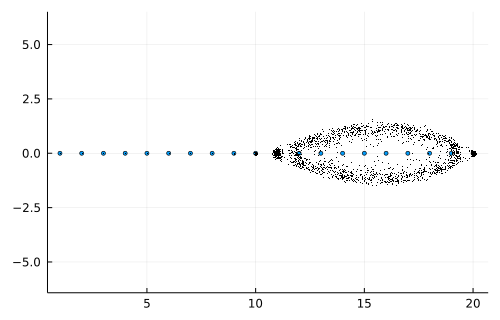

In [16]:
plt = scatter(λ,zeros(n),aspect_ratio=1)
for _ in 1:200
    ΔA = eps(Float32)*normalize(randn(n,n) + 1im*randn(n,n))
    λ̃ = eigvals(A+ΔA)
    scatter!(real(λ̃),imag(λ̃),m=1,color=:black)
end
plt

The plot shows that some eigenvalues are much more affected than others. This situation is not unusual, but it is not explained by the Bauer–Fike theorem.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Computing the EVD

Roots of the characteristic polynomial are not used in numerical methods for finding eigenvalues.[^eigpoly] Practical algorithms for computing the EVD go beyond the scope of this book. The essence of the matter is the connection to matrix powers indicated in {eq}`evdpower`. (We will see much more about the importance of matrix powers in Chapter 8.) 

If the eigenvalues have different complex magnitudes, then as $k\to\infty$ the entries on the diagonal of $\mathbf{D}^k$ become increasingly well separated and easy to pick out. It turns out that there is an astonishingly easy and elegant way to accomplish this separation without explicitly computing the matrix powers.

[^eigpoly]: In fact, the situation is reversed: eigenvalue methods are among the best ways to compute the roots of a given polynomial.

(demo-evd-francisqr)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let's start with a known set of eigenvalues and an orthogonal eigenvector basis.

In [17]:
D = diagm( [-6,-1,2,4,5] )
V,R = qr(randn(5,5))    # V is unitary
A = V*D*V'

5×5 Matrix{Float64}:
  2.37471    0.586347   0.434464  -2.47734   -0.848375
  0.586347  -3.32006   -1.52467   -3.48445    0.378924
  0.434464  -1.52467    2.00009   -0.269084  -0.656264
 -2.47734   -3.48445   -0.269084  -0.215217  -1.77458
 -0.848375   0.378924  -0.656264  -1.77458    3.16048

In [18]:
eigvals(A)

5-element Vector{Float64}:
 -6.000000000000005
 -1.0
  2.0000000000000013
  4.0000000000000036
  5.0000000000000036

Now we will take the QR factorization and just reverse the factors.

In [19]:
Q,R = qr(A)
A = R*Q;

It turns out that this is a similarity transformation, so the eigenvalues are unchanged.

In [20]:
eigvals(A)

5-element Vector{Float64}:
 -6.000000000000005
 -1.0000000000000009
  2.0000000000000004
  3.999999999999999
  5.000000000000001

What's remarkable, and not elementary, is that if we repeat this transformation many times, the resulting matrix converges to $\mathbf{D}$.

In [21]:
for k in 1:40
    Q,R = qr(A)
    A = R*Q
end
A

5×5 Matrix{Float64}:
 -5.99994       0.0258702     7.88205e-7    4.09894e-16  -8.82507e-16
  0.0258702     4.99994       0.000165004   4.55937e-17  -5.94789e-16
  7.88205e-7    0.000165004   4.0          -1.1039e-12    7.92213e-16
 -4.33424e-19  -1.08643e-16  -1.10379e-12   2.0          -1.63121e-12
 -2.63571e-31  -1.33081e-28   9.87482e-25  -1.63084e-12  -1.0

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


```{index} ! Francis QR iteration
```

The process demonstrated in {numref}`Demo {number} <demo-evd-francisqr>` is known as the *Francis QR iteration*, and it can be formulated as an $O(n^3)$ algorithm for finding the EVD. Such an algorithm is the foundation of what the `eigen` function uses.

## Exercises

1.  **(a)** ✍ Suppose that matrix $\mathbf{A}$ has an eigenvalue $\lambda$. Show that for any induced matrix norm, $\| \mathbf{A} \|\ge |\lambda|$.

    **(b)** ✍ Find a matrix $\mathbf{A}$ such that $\| \mathbf{A} \|_2$ is strictly larger than $|\lambda|$ for all eigenvalues $\lambda$. (Proof-by-computer isn't allowed here. You don't need to compute $\| \mathbf{A} \|_2$ exactly, just a lower bound for it.)

    (problem-defectivematrix)=
2. ✍ Prove that the matrix $\mathbf{B}$ in {eq}`jordanblock` does not have two independent eigenvectors.

3. ⌨ Use `eigvals` to find the eigenvalues of each matrix. Then for each eigenvalue $\lambda$, use `rank` to verify that $\lambda\mathbf{I}$ minus the given matrix is singular.
    
    $\mathbf{A} = \begin{bmatrix}
    2  & -1 & 0 \\
    -1 &  2 & -1 \\
    0  & -1 & 2
    \end{bmatrix}\qquad$
    $\mathbf{B} = \begin{bmatrix}
         2 & -1 & -1 \\
        -2 &  2 & -1 \\
        -1 & -2 & 2
      \end{bmatrix} \qquad$
    $ \mathbf{C} = \begin{bmatrix}
         2 & -1 & -1 \\
        -1 &  2 & -1 \\
        -1 & -1 & 2
      \end{bmatrix} $
    <br><br>
    $\mathbf{D} = \begin{bmatrix}
      3 & 1 & 0 & 0 \\
      1 & 3 & 1 & 0 \\
      0 & 1 & 3 & 1 \\
      0 & 0 & 1 & 3
    \end{bmatrix}\qquad $
    $\mathbf{E} = \begin{bmatrix}
         4 & -3 & -2 & -1\\
        -2 &  4 & -2 & -1 \\
        -1 & -2 & 4  & -1 \\
        -1 & -2 & -1 & 4 \\
      \end{bmatrix} $

    (problem-triangeval)=
4.  **(a)** ✍ Show that the eigenvalues of a diagonal $n\times n$ matrix $\mathbf{D}$ are the diagonal entries of $\mathbf{D}$. (That is, produce the associated eigenvectors.)

    **(b)** ✍ The eigenvalues of a triangular matrix are its diagonal entries. Prove this in the $3\times 3$ case,
    
    :::{math}
      \mathbf{T} =
      \begin{bmatrix}
        t_{11} & t_{12}&  t_{13}\\ 0 & t_{22} & t_{23} \\ 0 & 0 & t_{33}
      \end{bmatrix},
    :::

    by finding the eigenvectors. (Start by showing that $[1,0,0]^T$ is an eigenvector. Then show how to make $[a,1,0]^T$ an eigenvector, except for one case that does not change the outcome. Continue the same logic for $[a,b,1]^T$.)

5. ✍ Let $\mathbf{A}=\displaystyle\frac{\pi}{6}\begin{bmatrix} 4 & 1 \\ 4 & 4 \end{bmatrix}$.

    **(a)** Show that

    $$
    \lambda_1=\pi,\, \mathbf{v}_1=\begin{bmatrix}1 \\ 2 \end{bmatrix}, \quad \lambda_2=\frac{\pi}{3},\, \mathbf{v}_2=\begin{bmatrix}1 \\ -2 \end{bmatrix}
    $$

    yield an EVD of $\mathbf{A}$.

    **(b)** Use {eq}`matrixpolyevd` to evaluate $p(\mathbf{A})$, where $p(x) = (x-\pi)^4$.

    **(c)** Use the function analog of {eq}`matrixpolyevd` to evaluate $\cos(\mathbf{A})$.

    (problem-evd-lumpstring)=
6. ⌨ In [Exercise 2.3.5](problem-linear-systems-lumpstring), you showed that the
displacements of point masses placed along a string satisfy a linear system $\mathbf{A}\mathbf{q}=\mathbf{f}$ for an $(n-1)\times(n-1)$ matrix $\mathbf{A}$. The eigenvalues and eigenvectors of $\mathbf{A}$ correspond to resonant frequencies and modes of vibration of the string. For $n=40$ and the physical parameters given in part (b) of that exercise, find the eigenvalue decomposition of $\mathbf{A}$. Report the three eigenvalues with smallest absolute value, and plot all three associated eigenvectors on a single graph (as functions of the vector row index).

7. ⌨ {numref}`Demo {number} <demo-evd-francisqr>` suggests that the result of the Francis QR iteration as $k\to\infty$ sorts the eigenvalues on the diagonal according to a particular ordering. Following the code there as a model, create a random matrix with eigenvalues equal to $-9.6,-8.6,\ldots,10.4$, perform the iteration 200 times, and check whether the sorting criterion holds in your experiment as well.

8. ⌨ Eigenvalues of random matrices and their perturbations can be very interesting.
    
    **(a)** Let `A=randn(60,60)`. Scatter plot its eigenvalues in the complex plane, using `aspect_ratio=1` and red diamonds as markers.
    
    **(b)** Let $\mathbf{E}$ be another random $60\times 60$ matrix, and on top of the previous graph, plot the eigenvalues of $\mathbf{A}+0.05\mathbf{E}$ as blue dots. Repeat this for 100 different values of $\mathbf{E}$.
    
    **(c)** Let `T=triu(A)`. On a new graph, scatter plot the eigenvalues of $\mathbf{T}$ in the complex plane. (They all lie on the real axis.)

    **(d)** Repeat part (b) with $\mathbf{T}$ in place of $\mathbf{A}$.
    
    **(e)** Compute some condition numbers and apply {numref}`Theorem %s <theorem-bauer-fike>` to explain the dramatic difference between your plots with respect to the dot distributions.